<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/wheat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Getting the dataset**

In [1]:
import pathlib
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

In [2]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:26<00:00, 112MB/s]
100% 2.04G/2.04G [00:26<00:00, 83.4MB/s]


In [3]:
input_dir = pathlib.Path('/content/plantvillage-dataset.zip')

In [4]:
#Unzip the download file

zip_ref = zipfile.ZipFile('plantvillage-dataset.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [11]:
!ls plantvillage dataset

ls: cannot access 'plantvillage': No such file or directory
ls: cannot access 'dataset': No such file or directory


In [12]:
!ls plantvillage dataset/color

ls: cannot access 'plantvillage': No such file or directory
ls: cannot access 'dataset/color': No such file or directory


In [5]:
import pathlib
#Checking for images in the folder
wheat_data_dir = pathlib.Path('/content/plantvillage dataset/color')

image_count = len(list(wheat_data_dir.glob('*/*.jpg')))
print(image_count)

1500


In [6]:
#Get the class names
data_dir = pathlib.Path('/content/plantvillage dataset/color')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [7]:
# View an image
def view_random_image(target_dir, target_class):
  target_folder = os.path.join(target_dir, target_class)

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read the images and plot it with plt
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')
  print(f'Image shape: {img.shape}')

  return img



Image shape: (256, 256, 3)


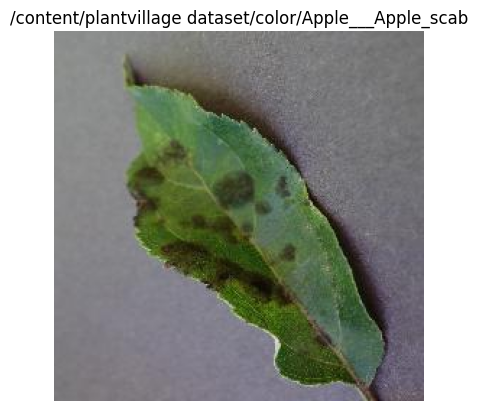

In [8]:
#View a random image from the dataset
img = view_random_image('/content/plantvillage dataset/color', target_class = '/content/plantvillage dataset/color/Apple___Apple_scab')

Image shape: (256, 256, 3)


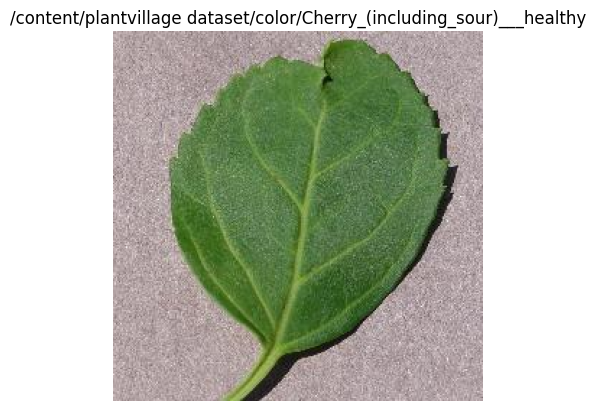

In [9]:
#View a random image from the dataset
img = view_random_image('/content/plantvillage dataset/color', target_class = '/content/plantvillage dataset/color/Cherry_(including_sour)___healthy')

In [10]:
img/255.

array([[[0.74117647, 0.67843137, 0.68235294],
        [0.69019608, 0.62745098, 0.63137255],
        [0.83921569, 0.77647059, 0.78039216],
        ...,
        [0.70980392, 0.65098039, 0.6627451 ],
        [0.76862745, 0.70980392, 0.72156863],
        [0.71372549, 0.65490196, 0.66666667]],

       [[0.65098039, 0.58823529, 0.59215686],
        [0.65490196, 0.59215686, 0.59607843],
        [0.74509804, 0.68235294, 0.68627451],
        ...,
        [0.65882353, 0.6       , 0.61176471],
        [0.76862745, 0.70980392, 0.72156863],
        [0.70588235, 0.64705882, 0.65882353]],

       [[0.75294118, 0.69019608, 0.69411765],
        [0.77647059, 0.71372549, 0.71764706],
        [0.74901961, 0.68627451, 0.69019608],
        ...,
        [0.60784314, 0.54901961, 0.56078431],
        [0.68235294, 0.62352941, 0.63529412],
        [0.78823529, 0.72941176, 0.74117647]],

       ...,

       [[0.70980392, 0.64705882, 0.65098039],
        [0.7372549 , 0.6745098 , 0.67843137],
        [0.6745098 , 0

## **Splitting the dataset into os and shutil**

In [11]:
import shutil
from sklearn.model_selection import train_test_split

In [12]:
#Define the source directory containing images and destination directories
source_dir = '/content/plantvillage dataset/color'
train_dir = 'content/train'
val_dir = 'content/val'
test_dir = 'content/test'

#Create train, validation and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

#Iterate through each class folder
for class_folder in os.listdir(source_dir):
  class_path = os.path.join(source_dir, class_folder)

  #Check if the current item is a directory (class)
  if os.path.isdir(class_path):

    #List all images for this class
    images = os.listdir(class_path)

    #Split images into train, validation and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    val_images, test_images = train_test_split(test_images, test_size=0.5, random_state=42)

    #Create subdirectories for this class in train, val and test folders
    os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_folder), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_folder), exist_ok=True)

    #Copy the images to the respective directoriese
    for image in train_images:
      shutil.copy(os.path.join(class_path, image), os.path.join(train_dir, class_folder, image))
    for image in val_images:
      shutil.copy(os.path.join(class_path, image), os.path.join(val_dir, class_folder, image))
    for image in test_images:
      shutil.copy(os.path.join(class_path, image), os.path.join(test_dir, class_folder, image))

## **Using DataGenerator**

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
#Set seed
tf.random.set_seed(42)

#Scaling/Normalization of my data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Setting up the train, validation and test
train_dir = '/content/content/train'
val_dir = '/content/content/val'
test_dir = '/content/content/test'

#Importing the data from directories and turn into atches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size =32,
                                               target_size=(224, 224),
                                               class_mode= 'categorical',
                                               shuffle=True,
                                               seed=42)

valid_data = val_datagen.flow_from_directory(val_dir,
                                               batch_size =32,
                                               target_size=(224, 224),
                                               class_mode= 'categorical',
                                               shuffle=True,
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size =32,
                                               target_size=(224, 224),
                                               class_mode= 'categorical',
                                               seed=42)

Found 43429 images belonging to 38 classes.
Found 5428 images belonging to 38 classes.
Found 5448 images belonging to 38 classes.


In [18]:

# Create CNN Model (Same model as VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(128, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                       padding = "valid"), # This can also be "same"
    tf.keras.layers.Conv2D(64, 3, activation = "relu"),
tf.keras.layers.Conv2D(32, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(38, activation = "softmax") # binary activation output
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [20]:
# fit the model
history_1 = model_1.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = train_data.batch_size,
                        validation_data = valid_data,
                        validation_steps = valid_data.batch_size)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 530s 17s/step - accuracy: 0.1323 - loss: 3.7476 - val_accuracy: 0.2764 - val_loss: 2.7817
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 488s 15s/step - accuracy: 0.3460 - loss: 2.5364 - val_accuracy: 0.3887 - val_loss: 2.3251
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 493s 16s/step - accuracy: 0.4550 - loss: 2.0895 - val_accuracy: 0.5039 - val_loss: 1.7475
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 485s 15s/step - accuracy: 0.5280 - loss: 1.7320 - val_accuracy: 0.4863 - val_loss: 1.7480
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 479s 15s/step - accuracy: 0.5442 - loss: 1.5158 - val_accuracy: 0.5752 - val_loss: 1.4931
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 416s 13s/step - accuracy: 0.6112 - loss: 1.4130 - val_accuracy: 0.6623 - val_loss: 1.1510
Epoch 7/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 482s 15s/step - accuracy: 0.6249 - loss: 1.2575 - val_accuracy: 0.6289 - val_loss: 1.2470
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 484s 15s/step - accuracy: 0.6808 - loss: 1.1385 - val_accuracy: 0.5918 - val_loss: 1.4178
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 475s 15s/step - accuracy: 0.6508 - loss: 1.2022 - val_accuracy: 0.6846 - val_loss: 1.0441
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 481s 15s/step - accuracy: 0.6986 - loss: 1.0028 - val_accuracy: 0.5967 - val_loss: 1.2608


In [ ]:
history_2 = model_1.fit(train_data,
                        epochs = 10,
                        steps_per_epoch = train_data,
                        validation_data = valid_data,
                        validation_steps = valid_data)

## **Visualizing Training Perfomance**

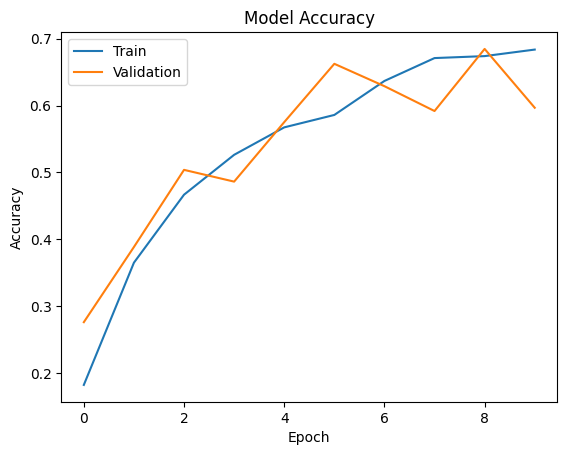

In [21]:
#Plot training and validation accuracy values
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [22]:
#Check the architecture of the model
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 220, 220, 128)       │          11,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 108, 108, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 106, 106, 32)        │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 89888)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      46,023,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          19,494 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 138,440,540 (528.11 MB)

 Trainable params: 46,146,846 (176.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 92,293,694 (352.07 MB)

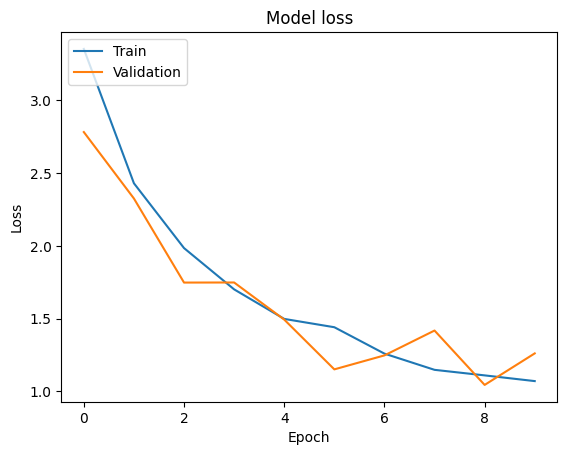

In [23]:
#Plot training and validation loss values
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## **Evaluate the model**

In [24]:
test_datagen = ImageDataGenerator()

test_data = test_datagen.flow_from_directory('/content/content/test',
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

test_loss, test_acc = model_1.evaluate(test_data)
print(f'Test accuracy: {test_acc}')

Found 5448 images belonging to 38 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


171/171 ━━━━━━━━━━━━━━━━━━━━ 529s 3s/step - accuracy: 0.3058 - loss: 481.4324
Test accuracy: 0.3013949990272522


## **Make Predictions**

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# Directory containing images
image_dir = '/content/plantvillage dataset/color'

# Choose a single image file from the directory
image_file = os.listdir(image_dir)[0]  # Select the first image in the directory

# Load and preprocess the chosen image
img_path = os.path.join(image_dir, image_file)
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Make prediction
prediction = model.predict(img_array)
print(f"Predicted class: {np.argmax(prediction)}")